<a href="https://colab.research.google.com/github/Edwin1719/Web_Scraping_ML/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WEB SCRAPING PAGINA DE OFERTAS MERCADO LIBRE**
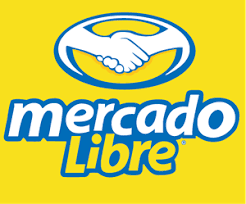

## **Preparando Entorno de trabajo e instalando librerias**

In [1]:
# Conexion con Google Drive Personal
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# prompt: importa las librerias necesarias para hacer web scraping en mercado libre y creaer un Dataframe pero con request y beatifull soup
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

## **Conexion a Mercado libre y Extracion de Datos**

In [3]:
# Conectando al sitio web y extrayendo el codigo Html para crear Dataframe
url = 'https://www.mercadolibre.com.co/ofertas?container_id=MCO779366-1&page=1'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'})
if response.status_code == 200:
  print(200)

# extrayendo el Html de los contenedores
productos = soup.find_all('div', class_='promotion-item__description')
imagenes = soup.find_all('div', class_='promotion-item__img-container')

# Creacion de lista vacia de Productos
Productos_df = []

for page in range(1, 21):
  url = f'https://www.mercadolibre.com.co/ofertas?container_id=MCO779366-1&page={page}'
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')

for producto, imagen in zip(productos, imagenes):
  data = {}
  nombre_tag = producto.find('p', class_='promotion-item__title')
  precio_tag = producto.find('span', class_='andes-money-amount__fraction')
  descuento_tag = producto.find('span', class_='promotion-item__discount-text')
  envio_tag = producto.find('span', class_='promotion-item__pill')
  vendedor_tag = producto.find('span', class_='promotion-item__seller')
  imagen_tag = imagen.find('img', class_='promotion-item__img')

  data['nombre'] = nombre_tag.text.strip() if nombre_tag else None
  data['precio'] = precio_tag.text.strip() if precio_tag else None
  data['descuento'] = descuento_tag.text.strip() if descuento_tag else '0%'
  data['envio'] = envio_tag.text.strip() if envio_tag else None
  data['vendedor'] = vendedor_tag.text.strip() if vendedor_tag else None
  data['imagen'] = imagen_tag['src'] if imagen_tag else None

  # Agregar los datos a la lista de productos
  Productos_df.append(data)

200


In [4]:
productos_df = pd.DataFrame(Productos_df)
productos_df.head()

,nombre,precio,descuento,envio,vendedor,imagen
0,Audífonos Sony Bluetooth Con Noise Cancelling ...,894.900,58% OFF,Llega gratis mañana,Por Sony,https://http2.mlstatic.com/D_Q_NP_613542-MLU75...
1,"Closet Bariloche Eco, Wengue Color Marrón oscuro",699.900,44% OFF,Envío gratis,Por RTA Muebles,https://http2.mlstatic.com/D_Q_NP_930517-MLU76...
2,Xiaomi Redmi Note 13 Pro 4G Dual SIM 256 GB pú...,1.028.500,22% OFF,Envío gratis,None,https://http2.mlstatic.com/D_Q_NP_658212-MLA75...
3,Bascula Digital de Peso Corporal Bluetooth Int...,63.900,57% OFF,Llega gratis mañana,Por Femmto Healthcare,https://http2.mlstatic.com/D_Q_NP_788704-MLU76...
4,Escritorio RTA Muebles Axis aglomerado de 116....,310.900,24% OFF,Envío gratis,Por RTA Muebles,https://http2.mlstatic.com/D_Q_NP_942963-MLU75...


## Definiendo la funcion de Limpieza de Datos

In [5]:
# Definiendo la funcion para limpieza de datos
def limpiar_datos(df):

  # Reemplaza los valores None de la columna vendedor por el valor Desconocido
  df['vendedor'] = df['vendedor'].fillna('Desconocido')

  # Elimina el valor inicial "Por" de la misma columna
  df['vendedor'] = df['vendedor'].str.replace('Por ', '')

  # Elimina el valor OFF de la columna descuento
  df['descuento'] = df['descuento'].str.replace('OFF', '')

  # Reemplaza el valor None de la columna envio por De pago
  df['envio'] = df['envio'].fillna('De pago')

  # Elimina el punto de la columna precio y convierte su valor a formato moneda
  df['precio'] = df['precio'].str.replace('.', '')
  df['precio'] = pd.to_numeric(df['precio'], errors='coerce')

  return df

# Limpia los datos del DataFrame
productos_ML = limpiar_datos(productos_df)

# Imprime el DataFrame limpio
productos_ML.head()


,nombre,precio,descuento,envio,vendedor,imagen
0,Audífonos Sony Bluetooth Con Noise Cancelling ...,894900,58%,Llega gratis mañana,Sony,https://http2.mlstatic.com/D_Q_NP_613542-MLU75...
1,"Closet Bariloche Eco, Wengue Color Marrón oscuro",699900,44%,Envío gratis,RTA Muebles,https://http2.mlstatic.com/D_Q_NP_930517-MLU76...
2,Xiaomi Redmi Note 13 Pro 4G Dual SIM 256 GB pú...,1028500,22%,Envío gratis,Desconocido,https://http2.mlstatic.com/D_Q_NP_658212-MLA75...
3,Bascula Digital de Peso Corporal Bluetooth Int...,63900,57%,Llega gratis mañana,Femmto Healthcare,https://http2.mlstatic.com/D_Q_NP_788704-MLU76...
4,Escritorio RTA Muebles Axis aglomerado de 116....,310900,24%,Envío gratis,RTA Muebles,https://http2.mlstatic.com/D_Q_NP_942963-MLU75...


## **Almacenamiento del DataFrame dentro de Google Drive**

In [6]:
# Guardando mi DataFrame en Google Drive
import os

# Define el directorio donde se guardará el archivo
output_directory = '/content/drive/MyDrive/Bases_Datos'

# Define el nombre del archivo
filename = 'Ofertas_Mercado_Libre.csv'

# Combina el directorio y el nombre del archivo para obtener la ruta completa
output_path = os.path.join(output_directory, filename)

# Guarda el DataFrame como un archivo CSV, reemplazando el archivo existente
productos_ML.to_csv(output_path, index=False, mode='w')
